### Exemplo de aproximação de curvas (ou funções).

Este exemplo utiliza uma rede neural para aproximar a função original por trás de dados ruidosos.

A função original é mostrada abaixo.
$$y = 2 + 1.4 \sin(1.2x) + 2.1 \cos(-2.2x + 3)$$

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# importa classe MLPRegressor do modulo neural network
from sklearn.neural_network import MLPRegressor

# módulo com classes para pré-processamento.
from sklearn import preprocessing

%matplotlib inline

In [157]:
# faz com que o gerador de numeros aleatorios sempre forneca os mesmos valores.
seed = 42
np.random.seed(seed) 

In [158]:
# define o número de amostras.
N = 1000

# gera os valores de x.
x = np.linspace(-10, 10, N).reshape(N,1)

# função original.
y = 2 + 1.4 * np.sin(1.2*x) + 2.1 * np.cos(-2.2*x + 3)

# adicionando ruido à função original.
y_noise = y + np.random.randn(N,1)

In [159]:
# instancia um objeto da classe MLPRegressor.
mlp = MLPRegressor(hidden_layer_sizes=(40,20,10), activation='tanh', solver='lbfgs', max_iter=4000, tol=1e-3, alpha=0.9, random_state=seed)

# treina a rede neural para aproximar a função original com a rede neural.
mlp.fit(x, y_noise.ravel())

# realiza predições.
yfit = mlp.predict(x)

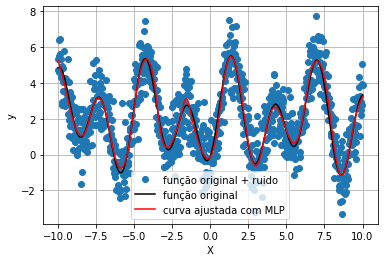

In [160]:
plt.figure()
plt.plot(x, y_noise, 'o', label = 'função original + ruido')
plt.plot(x, y, 'k', label = 'função original')
plt.plot(x, yfit, '-r', label = 'curva ajustada com MLP', zorder = 10)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

# salva figura em arquivo
plt.savefig('mlp_regression.png')

plt.show()